# CONVOLUSION DES IMAGES 

- Authors:

    - Emil Avila
    - Yulia Kalugina
    - Ricardo Vallejo    

# <font color="blue">Objective </font>

# <font color="blue">Load images </font>

In [23]:
# import the necessary packages
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
from PIL import Image
from IPhyton.display import display, clear_output


ModuleNotFoundError: No module named 'IPhyton'

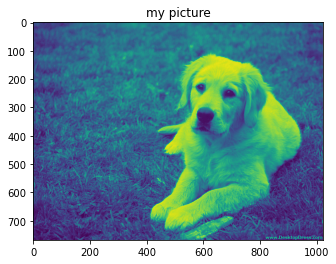

In [11]:
image = cv2.imread('chien.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('my picture')
plt.show()

In [12]:
# def convolve(image, kernel):
# grab the spatial dimensions of the image, along with
# the spatial dimensions of the kernel

def convolve(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
        # extract the ROI of the image by extracting the
        # *center* region of the current (x, y)-coordinates
        # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
        # perform the actual convolution by taking the
        # element-wise multiplicate between the ROI and
        # the kernel, then summing the matrix
            k = (roi * kernel).sum()
        # store the convolved value in the output (x,y)-
        # coordinate of the output image
            output[y - pad, x - pad] = k
        
        # rescale the output image to be in the range [0, 255]
        output = rescale_intensity(output, in_range=(0, 255))
        output = (output * 255).astype("uint8")
        # return the output image
        
        return output
    

In [13]:
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="uno.jpg")
# args = vars(ap.parse_args())

# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# construct a sharpening filter
sharpen = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")

# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int")


In [14]:
# construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convole` function and
# OpenCV's `filter2D` function
kernelBank = (
("small_blur", smallBlur),
("large_blur", largeBlur),
("sharpen", sharpen),
("laplacian", laplacian),
("sobel_x", sobelX),
("sobel_y", sobelY)
)

[INFO] applying small_blur kernel


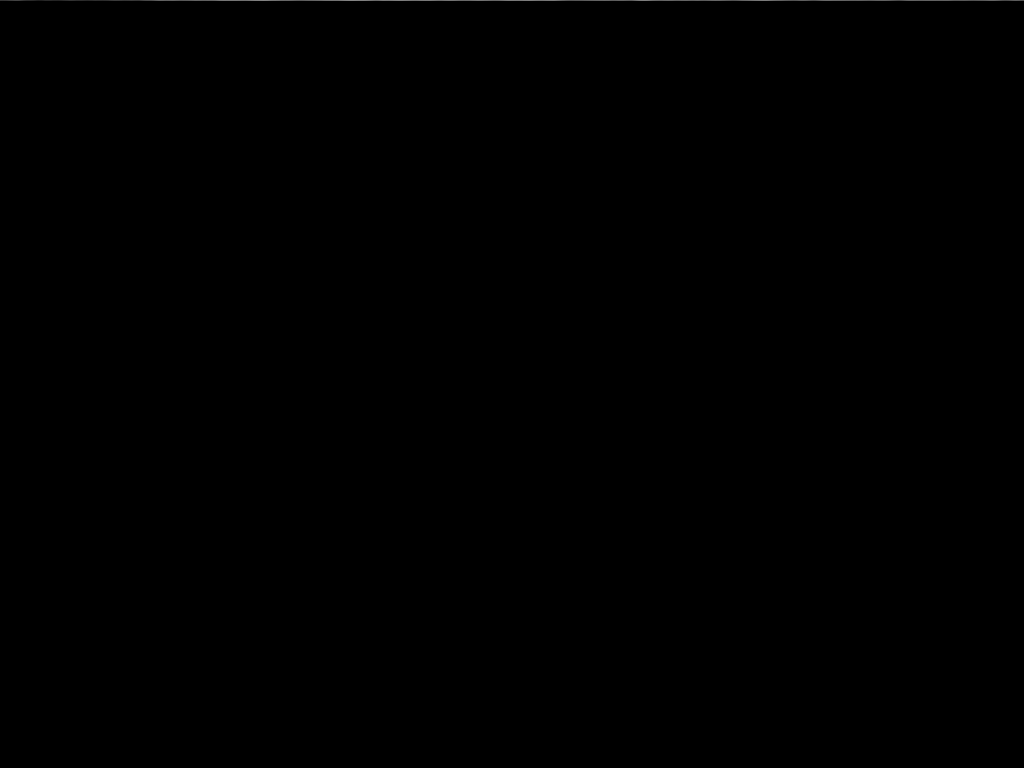

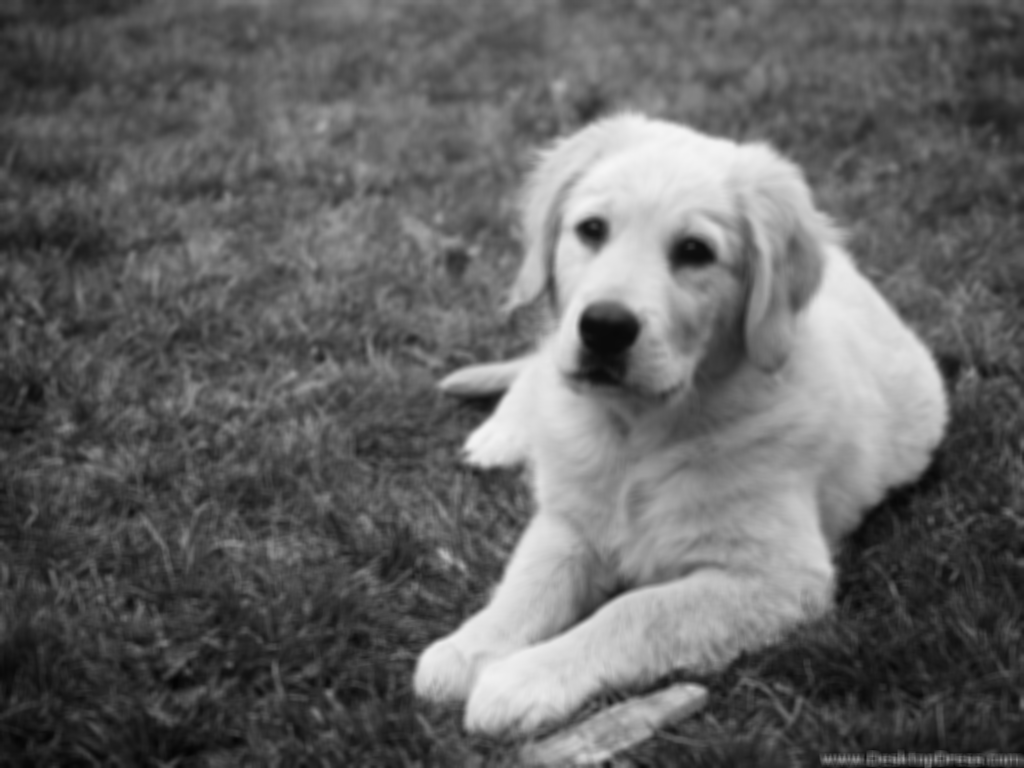

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelName, kernel = ("small_blur", smallBlur)
print("[INFO] applying {} kernel".format(kernelName))
convoleOutput = convolve(gray, kernel)
opencvOutput = cv2.filter2D(gray, -1, kernel)
display(Image.fromarray(convoleOutput))
display(Image.fromarray(opencvOutput))





[INFO] applying large_blur kernel


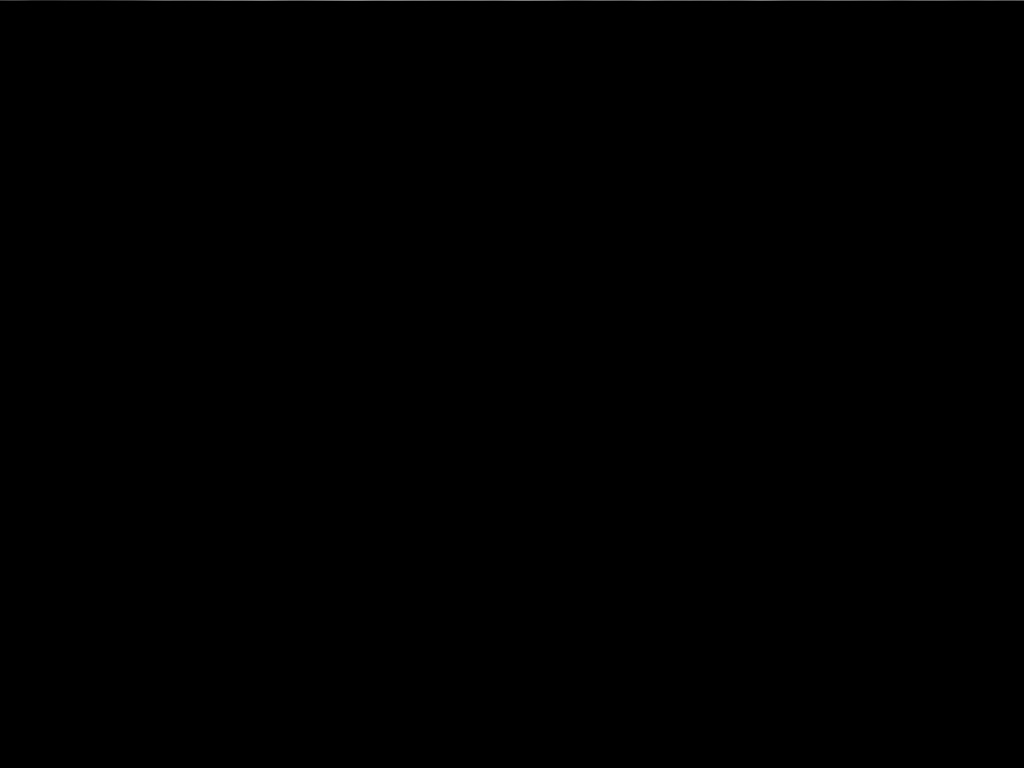

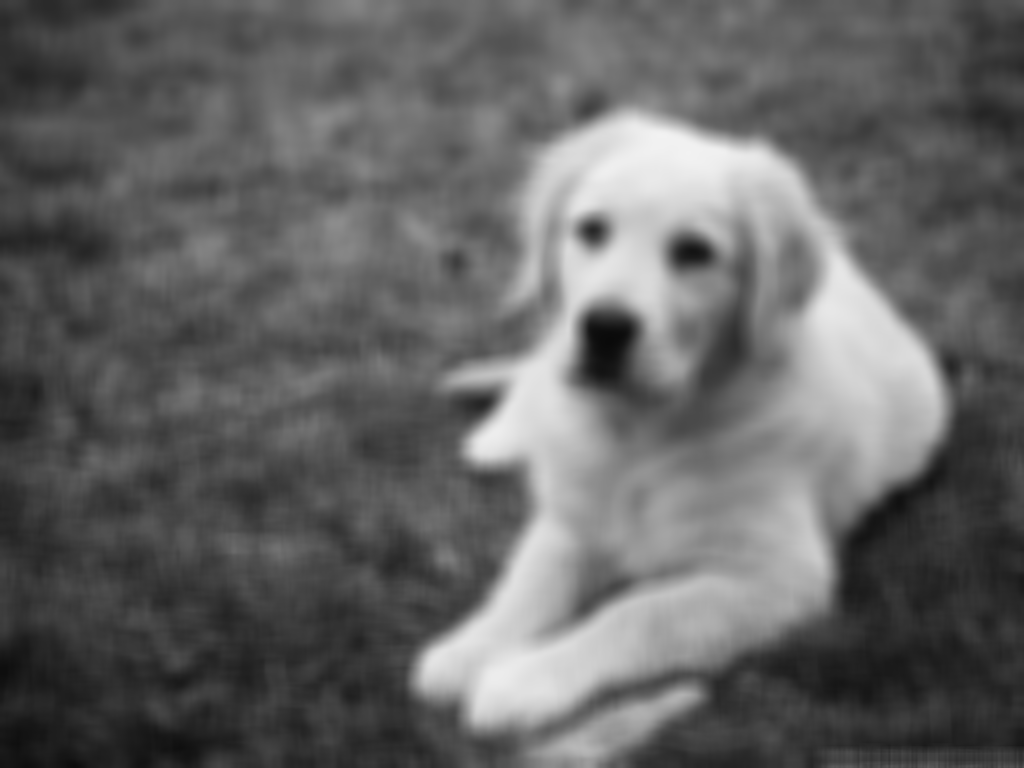

In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelName, kernel = ("large_blur", largeBlur)
print("[INFO] applying {} kernel".format(kernelName))
convoleOutput = convolve(gray, kernel)
opencvOutput = cv2.filter2D(gray, -1, kernel)
display(Image.fromarray(convoleOutput))
display(Image.fromarray(opencvOutput))





[INFO] applying laplacian kernel


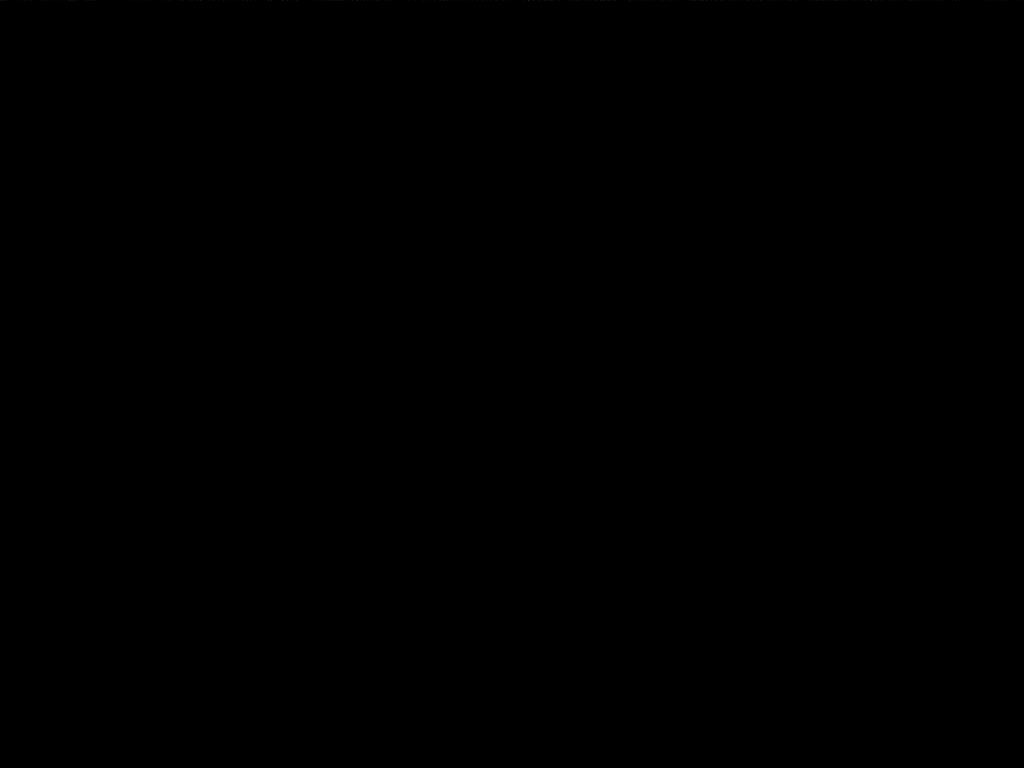

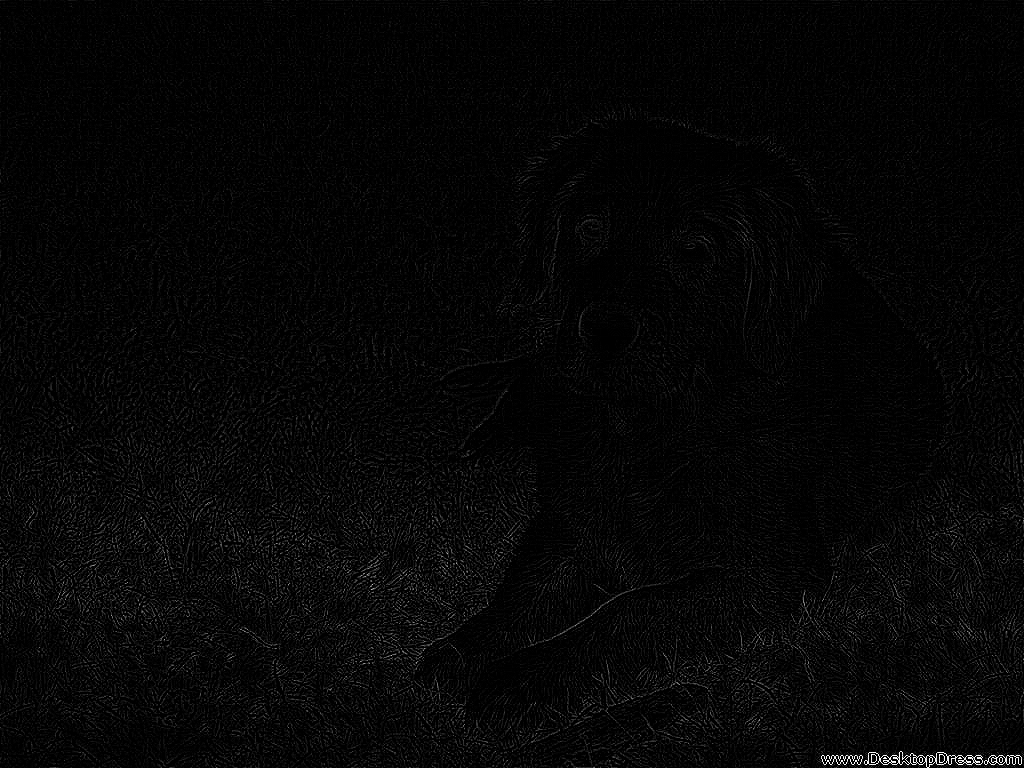

In [21]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelName, kernel =("laplacian", laplacian)
print("[INFO] applying {} kernel".format(kernelName))
convoleOutput = convolve(gray, kernel)
opencvOutput = cv2.filter2D(gray, -1, kernel)
display(Image.fromarray(convoleOutput))
display(Image.fromarray(opencvOutput))




[INFO] applying sharpen kernel


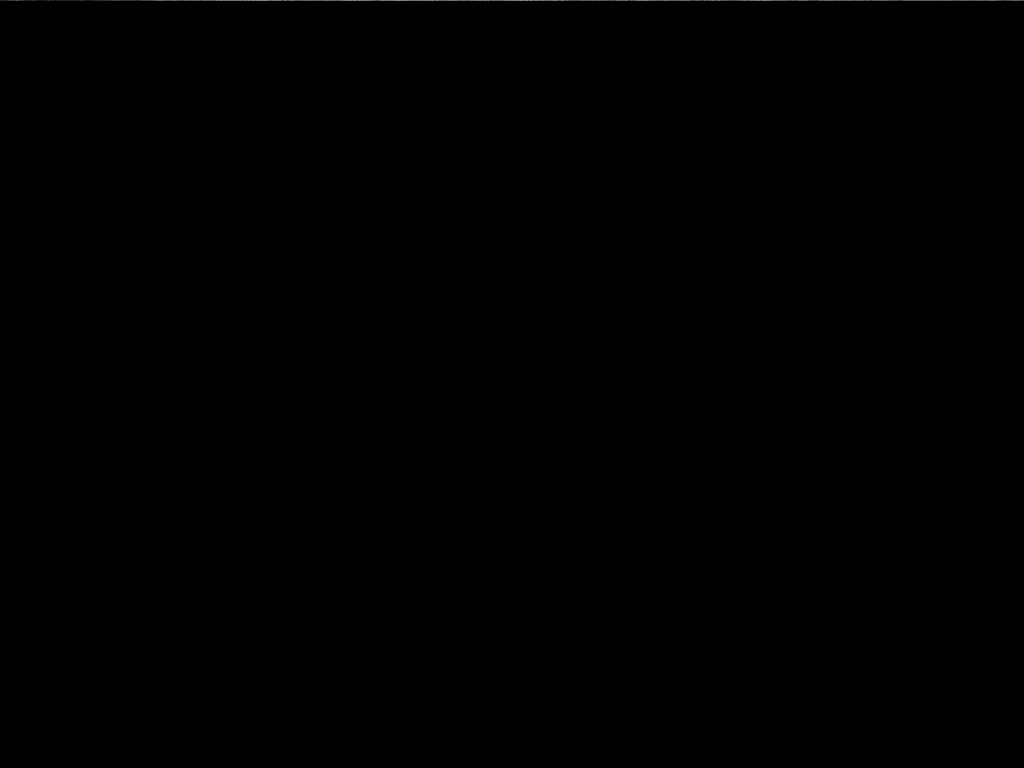

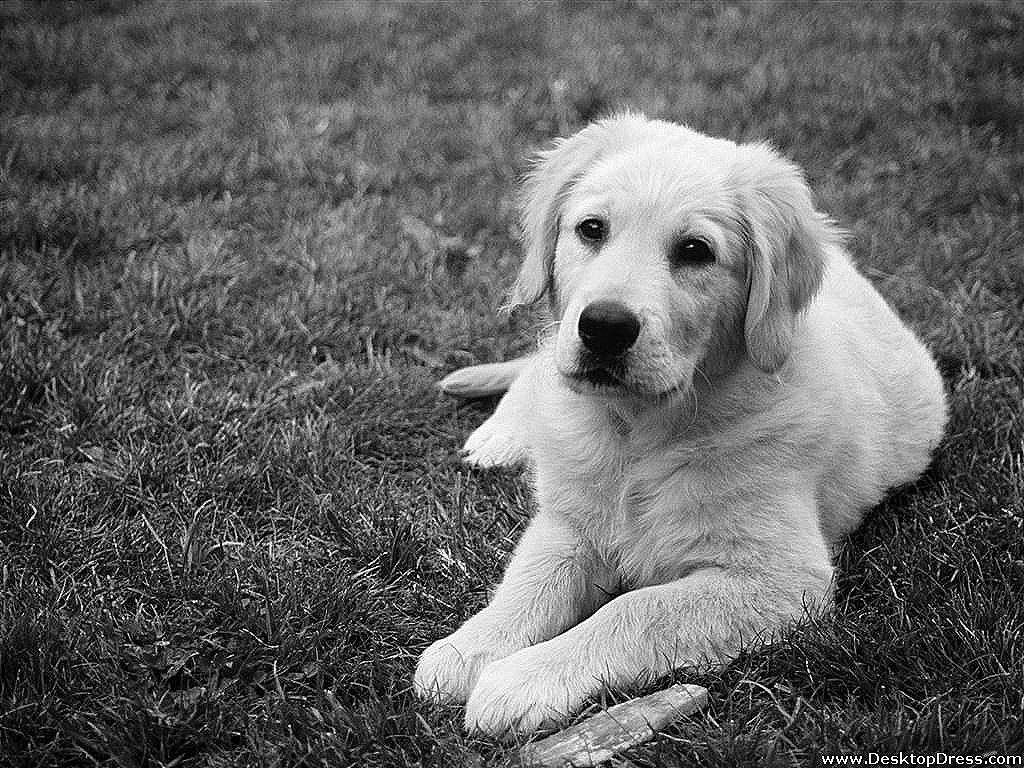

In [22]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelName, kernel = ("sharpen", sharpen)
print("[INFO] applying {} kernel".format(kernelName))
convoleOutput = convolve(gray, kernel)
opencvOutput = cv2.filter2D(gray, -1, kernel)
display(Image.fromarray(convoleOutput))
display(Image.fromarray(opencvOutput))



